In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
import warnings
import scipy.stats as stats
from scipy import stats as st
import plotly.express as px
from tqdm import tqdm
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#для удобства отобразим все колонки таблицы и приведем данные к формату двух знаков после запятой
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 1)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

Просмотр и стандартные функции предобработки таблиц

In [4]:
#функция для просмотра общей информации
def table_view(table):
    print('')
    print('')
    print('Первые 5 строк датафрейма')
    display(table.head(5))
    table.columns = table.columns.str.lower()
    print('')
    print('')
    print('Столбцы после переименования:')
    display(table.columns)
    print('')

    print('Типы данных и общая информация:')
    print(table.info())

    print('')
    print('Наличие дубликатов: {}'.format(table.duplicated().sum()))

    print('')
    print('Наличие пропусков')
    print(table.isna().sum())

In [5]:
table_view(visitors)



Первые 5 строк датафрейма


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756




Столбцы после переименования:


Index(['date', 'group', 'visitors'], dtype='object')


Типы данных и общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Наличие дубликатов: 0

Наличие пропусков
date        0
group       0
visitors    0
dtype: int64


In [6]:
table_view(orders)



Первые 5 строк датафрейма


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B




Столбцы после переименования:


Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')


Типы данных и общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Наличие дубликатов: 0

Наличие пропусков
transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64


Проинализировав первоначальные данные, видно, что столбцы с датами имеют тип object.

Для дальнейшей работы необходимо изменить тип на datetime в следующих датафреймах:

visitors - date

orders - date

In [7]:
#Замена типа данных для visitors['date']
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [8]:
#Замена типа данных для orders['date']
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
orders['group'] = orders['group'].astype('string')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   string        
dtypes: datetime64[ns](1), int64(3), string(1)
memory usage: 46.9 KB


Вывод

В ходе анализа все данные были исследованы, предобработанны и подготовлены к дальнейшей работе.

А именно:

- заголовки таблиц были приведены к нижнему регистру
- необходимые столбцы были преобразованы к соответствующему типу данных (datetime)
- данные были проверены на наличие дубликатов и пропусков.

In [10]:
orders.head()
display(orders.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   string        
dtypes: datetime64[ns](1), int64(3), string(1)
memory usage: 46.9 KB


None

In [11]:
err_orders = (
                    orders
                               .groupby('visitorid')
                               .agg({'group': 'nunique'})
                               .reset_index()
                               .query('group > 1')
                    )
print('Количество пользователей, участвующих в обоих тестрованиях: %s человека' % err_orders.shape[0])

Количество пользователей, участвующих в обоих тестрованиях: 58 человека


В отдельный датафрейм выведем пользователей попавших в оба теста:

In [12]:
orders_new = orders[orders['visitorid'].isin(err_orders['visitorid'].values)]

orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 2 to 1195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  181 non-null    int64         
 1   visitorid      181 non-null    int64         
 2   date           181 non-null    datetime64[ns]
 3   revenue        181 non-null    int64         
 4   group          181 non-null    string        
dtypes: datetime64[ns](1), int64(3), string(1)
memory usage: 8.5 KB


In [13]:
#удаляем пользователей, которые в двух тестах
orders = orders[~orders['visitorid'].isin(err_orders['visitorid'].values)]
orders.head()
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   string        
dtypes: datetime64[ns](1), int64(3), string(1)
memory usage: 47.6 KB


None

In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   string        
dtypes: datetime64[ns](1), int64(3), string(1)
memory usage: 47.6 KB


In [17]:
err_participants = (
                    orders
                               .groupby('visitorid')
                               .agg({'group': 'nunique'})
                               .reset_index()
                               .query('group > 1')
                    )
print('Количество пользователей, участвующих в обоих тестрованиях: %s человека' % err_participants.shape[0])

Количество пользователей, участвующих в обоих тестрованиях: 0 человека


In [18]:
participants_new = orders[orders['visitorid'].isin(err_participants['visitorid'].values)]

participants_new.head(6)

,transactionid,visitorid,date,revenue,group


In [19]:
err_participants_B =  participants_new.query('group =="B"')
print('Количество пользователей группы В параллельного теста: %s человека' % err_participants_B.shape[0])

Количество пользователей группы В параллельного теста: 0 человека


In [20]:
err_participants_A =  participants_new.query('group =="A"')
print('Количество пользователей группы A параллельного теста: %s человека' % err_participants_A.shape[0])



Количество пользователей группы A параллельного теста: 0 человека


In [21]:
orders.drop_duplicates (keep=False, subset=['visitorid', 'group'])


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [22]:
datesgroups = orders[['date','group']].drop_duplicates()


In [23]:
datesgroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [24]:
datesgroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [25]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [26]:
#сумму посетителей по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])

In [27]:
#скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()

In [28]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [29]:
cummulative.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,37,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,61,346854,1845


In [30]:
#создание переменных
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue', 'orders']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue', 'orders']]

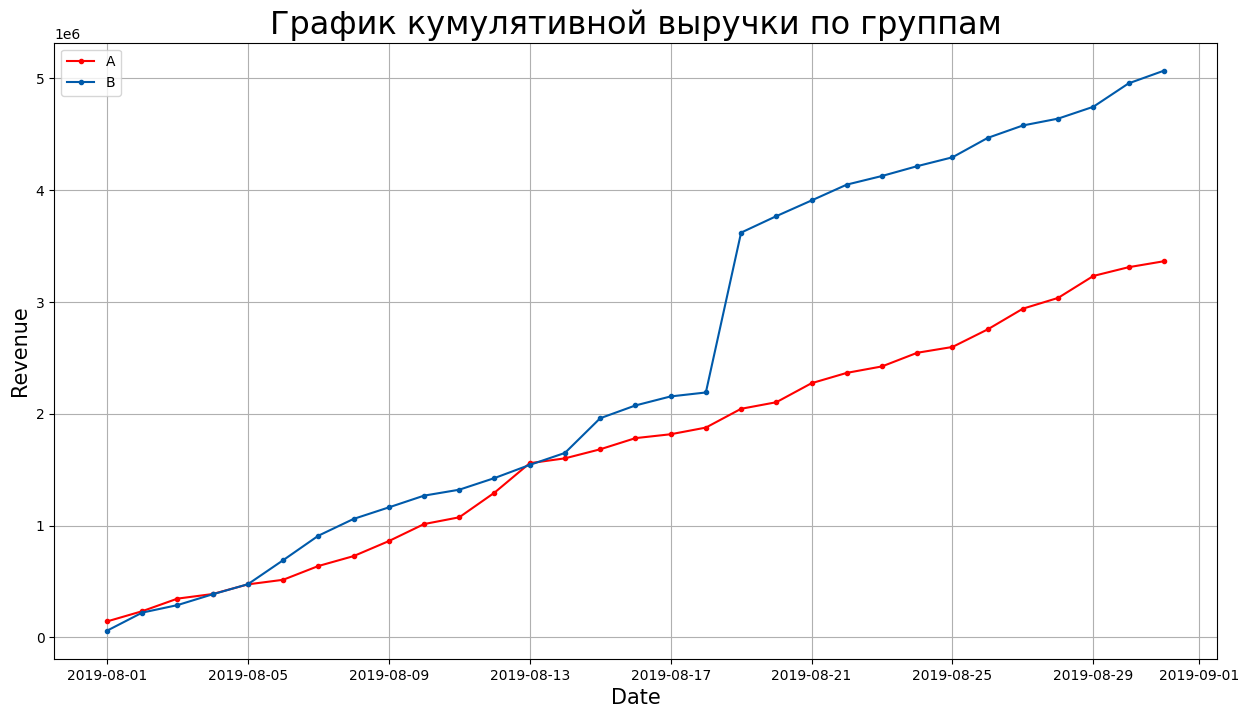

In [31]:
# Строим график выручки группы A
plt.figure(figsize=(15,8))
plt.plot(cummulativeA['date'], cummulativeA['revenue'], label='A', marker = '.', color = 'r')

# Строим график выручки группы B
plt.plot(cummulativeB['date'], cummulativeB['revenue'], label='B', marker = '.', color = '#005aaa')

plt.title('График кумулятивной выручки по группам', size=23)
plt.xlabel("Date", size=15)
plt.ylabel("Revenue", size=15)

plt.legend()
plt.grid()
plt.show()

До 18.08.2019 выручка растёт равномерно.

После 18.08.2019 в группе B наблюдается резкий скачок.

Это может говорить о всплеске числа заказов, либо о появлении очень дорогих заказов.